**Punto 1**

1. Generación del Dataset:

In [18]:
!pip install gdown

In [2]:
import numpy as np
import pandas as pd

# Dataset para raíz cuadrada (nuestro objetivo)
X_sqrt = np.linspace(0, 1000, 10000)  # 10,000 puntos entre 0-1000
y_sqrt = np.sqrt(X_sqrt)

# Crear DataFrames
df_sqrt = pd.DataFrame({'x': X_sqrt, 'y': y_sqrt})

2. Modelado con Red Neuronal:

In [3]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Preparar datos para raíz cuadrada
X = df_sqrt[['x']].values
y = df_sqrt['y'].values

# Dividir datos (80% entrenamiento, 20% validación)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar características (importante para redes neuronales)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Crear y entrenar modelo de red neuronal
model = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32),  # Arquitectura de capas
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)

model.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=(128, 64, 32), max_iter=1000, random_state=42)

3. Evaluación del Modelo:

In [4]:
# Predecir en conjunto de validación
y_pred = model.predict(X_val_scaled)

# Calcular error
mse = mean_squared_error(y_val, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse:.6f}")
print(f"Raíz del MSE (RMSE): {np.sqrt(mse):.6f}")

Error Cuadrático Medio (MSE): 0.004792
Raíz del MSE (RMSE): 0.069222


4. Comparación con 10 Ejemplos:


Comparación con 10 ejemplos:
        Valor  Raíz Real  Raíz Predicha  Diferencia  Error Relativo (%)
0   55.804794   7.470261       7.453278    0.016983            0.227338
1  182.729522  13.517748      13.535721    0.017972            0.132954
2  307.607295  17.538737      17.538849    0.000112            0.000640
3  451.910967  21.258198      21.262731    0.004534            0.021327
4  694.870050  26.360388      26.348680    0.011707            0.044413
5  769.288644  27.736053      27.713265    0.022788            0.082162
6  819.414532  28.625418      28.628056    0.002639            0.009217
7  870.260382  29.500176      29.471101    0.029075            0.098557
8  905.407316  30.089987      30.053852    0.036135            0.120089
9  920.897846  30.346299      30.310692    0.035607            0.117336


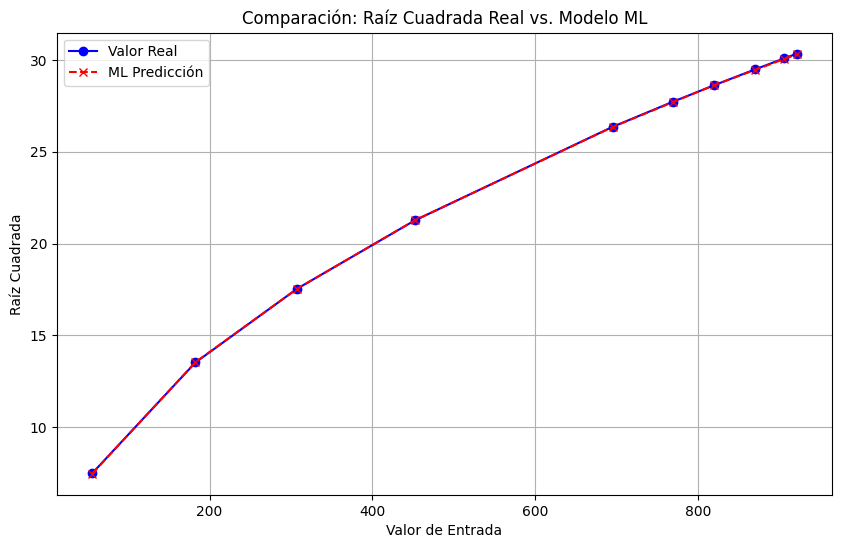

In [5]:
import matplotlib.pyplot as plt

# Generar 10 ejemplos aleatorios
test_values = np.random.uniform(0, 1000, 10)
test_values.sort()

# Calcular valores reales y predichos
real_sqrt = np.sqrt(test_values)
predicted_sqrt = model.predict(scaler.transform(test_values.reshape(-1, 1)))

# Crear tabla comparativa
results = pd.DataFrame({
    'Valor': test_values,
    'Raíz Real': real_sqrt,
    'Raíz Predicha': predicted_sqrt,
    'Diferencia': np.abs(real_sqrt - predicted_sqrt),
    'Error Relativo (%)': np.abs((real_sqrt - predicted_sqrt) / real_sqrt) * 100
})

print("\nComparación con 10 ejemplos:")
print(results)

# Visualización
plt.figure(figsize=(10, 6))
plt.plot(test_values, real_sqrt, 'bo-', label='Valor Real')
plt.plot(test_values, predicted_sqrt, 'r--', marker='x', label='ML Predicción')
plt.title('Comparación: Raíz Cuadrada Real vs. Modelo ML')
plt.xlabel('Valor de Entrada')
plt.ylabel('Raíz Cuadrada')
plt.legend()
plt.grid(True)
plt.show()

**Punto 2**

1. Generación del Dataset:

In [6]:
import cv2
import numpy as np

def preprocess_thermal_image(img_path):
    # Leer imagen térmica (matriz de temperaturas)
    img = cv2.imread(img_path, cv2.IMREAD_ANYDEPTH)

    # Normalización
    img_norm = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    # Filtrado de ruido
    img_denoised = cv2.fastNlMeansDenoising(img_norm, h=15)

    # Mejora de contraste
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    img_enhanced = clahe.apply(img_denoised)

    return img_enhanced

2. Extracción de características:

In [7]:
from skimage.feature import graycomatrix, graycoprops

def extract_features(img):
    features = []

    # 1. Histograma de temperaturas
    hist = cv2.calcHist([img], [0], None, [16], [0,256])
    features.extend(hist.flatten())

    # 2. Texturas (GLCM)
    glcm = graycomatrix(img, distances=[1], angles=[0], symmetric=True, normed=True)
    features.append(graycoprops(glcm, 'contrast')[0,0])
    features.append(graycoprops(glcm, 'energy')[0,0])
    features.append(graycoprops(glcm, 'homogeneity')[0,0])

    # 3. Puntos calientes
    max_val = np.max(img)
    hot_spots = np.sum(img > 0.95*max_val) / img.size
    features.append(hot_spots)

    # 4. Gradientes térmicos
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
    grad_mag = np.sqrt(sobelx**2 + sobely**2)
    features.append(np.mean(grad_mag))

    return np.array(features)

In [7]:
import os
import requests
import zipfile
import io

url = 'https://drive.google.com/uc?export=download&id=1IVCaYblzk9xwB6RUqSZzTSB7RqSgmKTn'
fname = 'archive'


data_path = "./archive"
if not os.path.exists(data_path):
    print("Data is being downloaded...")
    r = requests.get(url, stream=True)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall()
    print("The download has been completed.")
else:
    print("Data has already been downloaded.")

Data is being downloaded...
The download has been completed.


In [19]:
import gdown


# Tu ID de archivo de Google Drive
file_id = '1hSC8QMiCNxi82AfLguIGrRQhwQMQUq8B'
data_path = "./Train"

if not os.path.exists(data_path):
    print("Data is being downloaded...")

    # Descarga el archivo usando gdown
    output_path = 'dataset.zip'
    gdown.download(f'https://drive.google.com/uc?id={file_id}', output_path, quiet=False)

    # Extrae el archivo ZIP
    with zipfile.ZipFile(output_path, 'r') as zip_ref:
        zip_ref.extractall()

    # Opcional: eliminar el archivo ZIP después de extraer
    os.remove(output_path)

    print("The download has been completed.")
else:
    print("Data has already been downloaded.")

Data is being downloaded...


Downloading...
From (original): https://drive.google.com/uc?id=1hSC8QMiCNxi82AfLguIGrRQhwQMQUq8B
From (redirected): https://drive.google.com/uc?id=1hSC8QMiCNxi82AfLguIGrRQhwQMQUq8B&confirm=t&uuid=958a825f-7490-4481-aaf4-df1533d1b546
To: /content/dataset.zip
100%|██████████| 1.57G/1.57G [00:18<00:00, 85.8MB/s]


The download has been completed.


3. Entrenamiento del SVM:

Iniciando carga del dataset...
Cargando imágenes de humanos...
Cargadas 1782 imágenes de humanos
Cargando imágenes de gatos...
Cargadas 1782 imágenes de gatos
Total de imágenes cargadas: 3564
Dataset cargado: 3564 muestras, 35 características por muestra
Distribución de clases: Humanos=1782, Gatos=1782
Escalando características...
Dividiendo dataset...
Conjunto de entrenamiento: 2673 muestras
Conjunto de prueba: 891 muestras
Entrenando modelo SVM...
Modelo entrenado exitosamente!
Evaluando modelo...

REPORTE DE CLASIFICACIÓN
              precision    recall  f1-score   support

      Humano       0.93      0.93      0.93       446
        Gato       0.93      0.93      0.93       445

    accuracy                           0.93       891
   macro avg       0.93      0.93      0.93       891
weighted avg       0.93      0.93      0.93       891


Precisión general: 0.930 (93.0%)


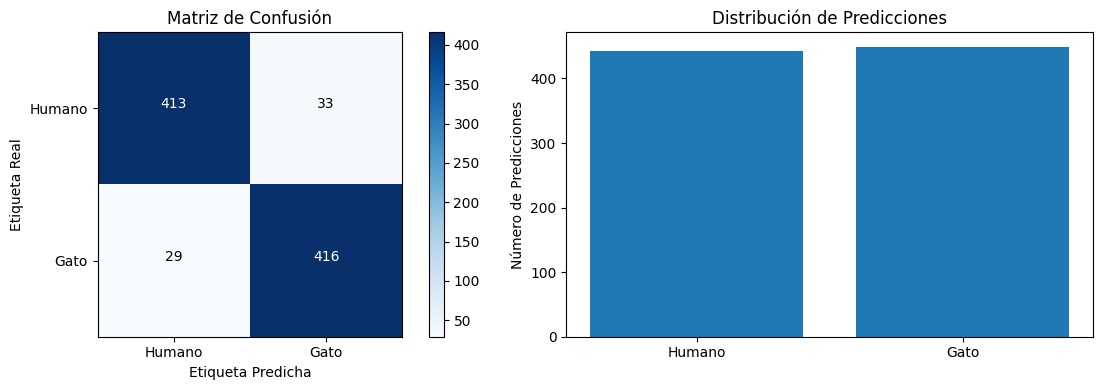


EJEMPLOS DE PREDICCIONES CON PROBABILIDADES
Muestra 1:
  Real: Humano | Predicción: Humano
  Prob. Humano: 0.982 | Prob. Gato: 0.018

Muestra 2:
  Real: Gato | Predicción: Gato
  Prob. Humano: 0.025 | Prob. Gato: 0.975

Muestra 3:
  Real: Humano | Predicción: Humano
  Prob. Humano: 0.935 | Prob. Gato: 0.065

Muestra 4:
  Real: Humano | Predicción: Humano
  Prob. Humano: 0.863 | Prob. Gato: 0.137

Muestra 5:
  Real: Humano | Predicción: Humano
  Prob. Humano: 1.000 | Prob. Gato: 0.000



In [20]:
import os
import cv2
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from glob import glob

def preprocess_thermal_image(img_path, target_size=(64, 64)):
    """
    Preprocesa imagen térmica
    """
    try:
        # Leer imagen
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"No se pudo cargar la imagen: {img_path}")
            return None

        # Redimensionar
        img = cv2.resize(img, target_size)

        # Normalizar valores de píxel a rango [0, 1]
        img = img.astype(np.float32) / 255.0

        # Aplicar filtro gaussiano para reducir ruido
        img = cv2.GaussianBlur(img, (3, 3), 0)

        return img
    except Exception as e:
        print(f"Error procesando {img_path}: {e}")
        return None

def extract_features(img):
    """
    Extrae características de la imagen térmica
    """
    if img is None:
        return None

    features = []

    # 1. Características estadísticas básicas
    features.extend([
        np.mean(img),           # Media de intensidad
        np.std(img),            # Desviación estándar
        np.min(img),            # Valor mínimo
        np.max(img),            # Valor máximo
        np.median(img),         # Mediana
        np.var(img)             # Varianza
    ])

    # 2. Características de histograma
    hist, _ = np.histogram(img.flatten(), bins=16, range=(0, 1))
    hist = hist / np.sum(hist)  # Normalizar
    features.extend(hist.tolist())

    # 3. Características de gradiente (bordes)
    grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)

    features.extend([
        np.mean(gradient_magnitude),
        np.std(gradient_magnitude),
        np.max(gradient_magnitude)
    ])

    # 4. Características de textura (LBP simplificado)
    # Dividir imagen en regiones y calcular estadísticas
    h, w = img.shape
    regions = [
        img[0:h//2, 0:w//2],      # Superior izquierda
        img[0:h//2, w//2:w],      # Superior derecha
        img[h//2:h, 0:w//2],      # Inferior izquierda
        img[h//2:h, w//2:w]       # Inferior derecha
    ]

    for region in regions:
        features.extend([
            np.mean(region),
            np.std(region)
        ])

    # 5. Características de contraste local
    kernel = np.ones((5,5), np.float32) / 25
    img_smooth = cv2.filter2D(img, -1, kernel)
    contrast = np.abs(img - img_smooth)
    features.extend([
        np.mean(contrast),
        np.std(contrast)
    ])

    return np.array(features)

def load_dataset(base_path):
    """
    Carga el dataset desde las carpetas
    """
    X = []  # Características
    y = []  # Etiquetas (0 = hombre, 1 = gatos)

    # Rutas de las carpetas
    human_path = os.path.join(base_path, "hombre")  # Ajusta el nombre de la carpeta
    cat_path = os.path.join(base_path, "gatos")     # Ajusta el nombre de la carpeta

    # Extensiones de imagen comunes
    extensions = ['*.jpg', '*.jpeg', '*.png', '*.bmp', '*.tiff', '*.tif']

    print("Cargando imágenes de humanos...")
    # Cargar imágenes de humanos (etiqueta 0)
    human_count = 0
    for ext in extensions:
        for img_path in glob(os.path.join(human_path, ext)):
            img = preprocess_thermal_image(img_path)
            if img is not None:
                features = extract_features(img)
                if features is not None:
                    X.append(features)
                    y.append(0)  # Etiqueta para humano
                    human_count += 1

    print(f"Cargadas {human_count} imágenes de humanos")

    print("Cargando imágenes de gatos...")
    # Cargar imágenes de gatos (etiqueta 1)
    cat_count = 0
    for ext in extensions:
        for img_path in glob(os.path.join(cat_path, ext)):
            img = preprocess_thermal_image(img_path)
            if img is not None:
                features = extract_features(img)
                if features is not None:
                    X.append(features)
                    y.append(1)  # Etiqueta para gato
                    cat_count += 1

    print(f"Cargadas {cat_count} imágenes de gatos")
    print(f"Total de imágenes cargadas: {len(X)}")

    return np.array(X), np.array(y)

def plot_results(y_test, y_pred, feature_importance=None):
    """
    Visualiza los resultados
    """
    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(12, 4))

    # Subplot 1: Matriz de confusión
    plt.subplot(1, 2, 1)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matriz de Confusión')
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Humano', 'Gato'])
    plt.yticks(tick_marks, ['Humano', 'Gato'])

    # Añadir texto a la matriz
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Etiqueta Real')
    plt.xlabel('Etiqueta Predicha')

    # Subplot 2: Distribución de predicciones
    plt.subplot(1, 2, 2)
    unique, counts = np.unique(y_pred, return_counts=True)
    labels = ['Humano', 'Gato']
    plt.bar([labels[i] for i in unique], counts)
    plt.title('Distribución de Predicciones')
    plt.ylabel('Número de Predicciones')

    plt.tight_layout()
    plt.show()

# CÓDIGO PRINCIPAL
def main():
    # Ruta base donde están tus carpetas (ajusta esta ruta)
    BASE_PATH = "./Train"  # Cambia esto por la ruta correcta

    print("Iniciando carga del dataset...")

    # Cargar dataset
    X, y = load_dataset(BASE_PATH)

    if len(X) == 0:
        print("No se cargaron imágenes. Verifica las rutas de las carpetas.")
        return

    print(f"Dataset cargado: {len(X)} muestras, {X.shape[1]} características por muestra")
    print(f"Distribución de clases: Humanos={np.sum(y==0)}, Gatos={np.sum(y==1)}")

    # Preprocesamiento de datos
    print("Escalando características...")
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # División de datos
    print("Dividiendo dataset...")
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y,
        test_size=0.25,
        random_state=42,
        stratify=y  # Mantiene la proporción de clases
    )

    print(f"Conjunto de entrenamiento: {len(X_train)} muestras")
    print(f"Conjunto de prueba: {len(X_test)} muestras")

    # Creación y entrenamiento del SVM
    print("Entrenando modelo SVM...")
    svm_model = SVC(
        kernel='rbf',
        C=10,              # Parámetro de regularización
        gamma=0.01,        # Parámetro del kernel RBF
        probability=True,   # Para obtener probabilidades
        random_state=42
    )

    svm_model.fit(X_train, y_train)
    print("Modelo entrenado exitosamente!")

    # Evaluación
    print("Evaluando modelo...")
    y_pred = svm_model.predict(X_test)

    # Reporte de clasificación
    target_names = ['Humano', 'Gato']
    print("\n" + "="*50)
    print("REPORTE DE CLASIFICACIÓN")
    print("="*50)
    print(classification_report(y_test, y_pred, target_names=target_names))

    # Precisión general
    accuracy = np.mean(y_pred == y_test)
    print(f"\nPrecisión general: {accuracy:.3f} ({accuracy*100:.1f}%)")

    # Visualizar resultados
    plot_results(y_test, y_pred)

    # Ejemplo de predicción con probabilidades
    print("\n" + "="*50)
    print("EJEMPLOS DE PREDICCIONES CON PROBABILIDADES")
    print("="*50)

    # Obtener probabilidades para las primeras 5 muestras de prueba
    probabilities = svm_model.predict_proba(X_test[:5])

    for i in range(min(5, len(X_test))):
        real_label = "Humano" if y_test[i] == 0 else "Gato"
        pred_label = "Humano" if y_pred[i] == 0 else "Gato"
        prob_human = probabilities[i][0]
        prob_cat = probabilities[i][1]

        print(f"Muestra {i+1}:")
        print(f"  Real: {real_label} | Predicción: {pred_label}")
        print(f"  Prob. Humano: {prob_human:.3f} | Prob. Gato: {prob_cat:.3f}")
        print()

    return svm_model, scaler

# Ejecutar el programa principal
if __name__ == "__main__":
    modelo, escalador = main()

# FUNCIÓN PARA PREDECIR NUEVAS IMÁGENES
def predict_new_image(model, scaler, img_path):
    """
    Predice la clase de una nueva imagen
    """
    img = preprocess_thermal_image(img_path)
    if img is None:
        return None, None

    features = extract_features(img)
    if features is None:
        return None, None

    # Escalar características
    features_scaled = scaler.transform([features])

    # Predicción
    prediction = model.predict(features_scaled)[0]
    probabilities = model.predict_proba(features_scaled)[0]

    label = "Humano" if prediction == 0 else "Gato"
    confidence = max(probabilities)

    return label, confidence

# Ejemplo de uso para nueva predicción:
# resultado, confianza = predict_new_image(modelo, escalador, "ruta/a/nueva/imagen.jpg")
# print(f"Predicción: {resultado} (Confianza: {confianza:.3f})")

**Punto 3**

🏦 SISTEMA DE CLASIFICACIÓN DE TARJETAS DE CRÉDITO
📊 Cargando datos...

Columns in self.labels after loading:
Index(['Ind_ID', 'label'], dtype='object')

Columns in self.data after merging:
Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')
✅ Datos cargados exitosamente:
   - Filas: 1548
   - Columnas: 19
   - Aplicaciones aprobadas: 1373
   - Aplicaciones rechazadas: 175

🔍 ANÁLISIS EXPLORATORIO DE DATOS

📋 Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-

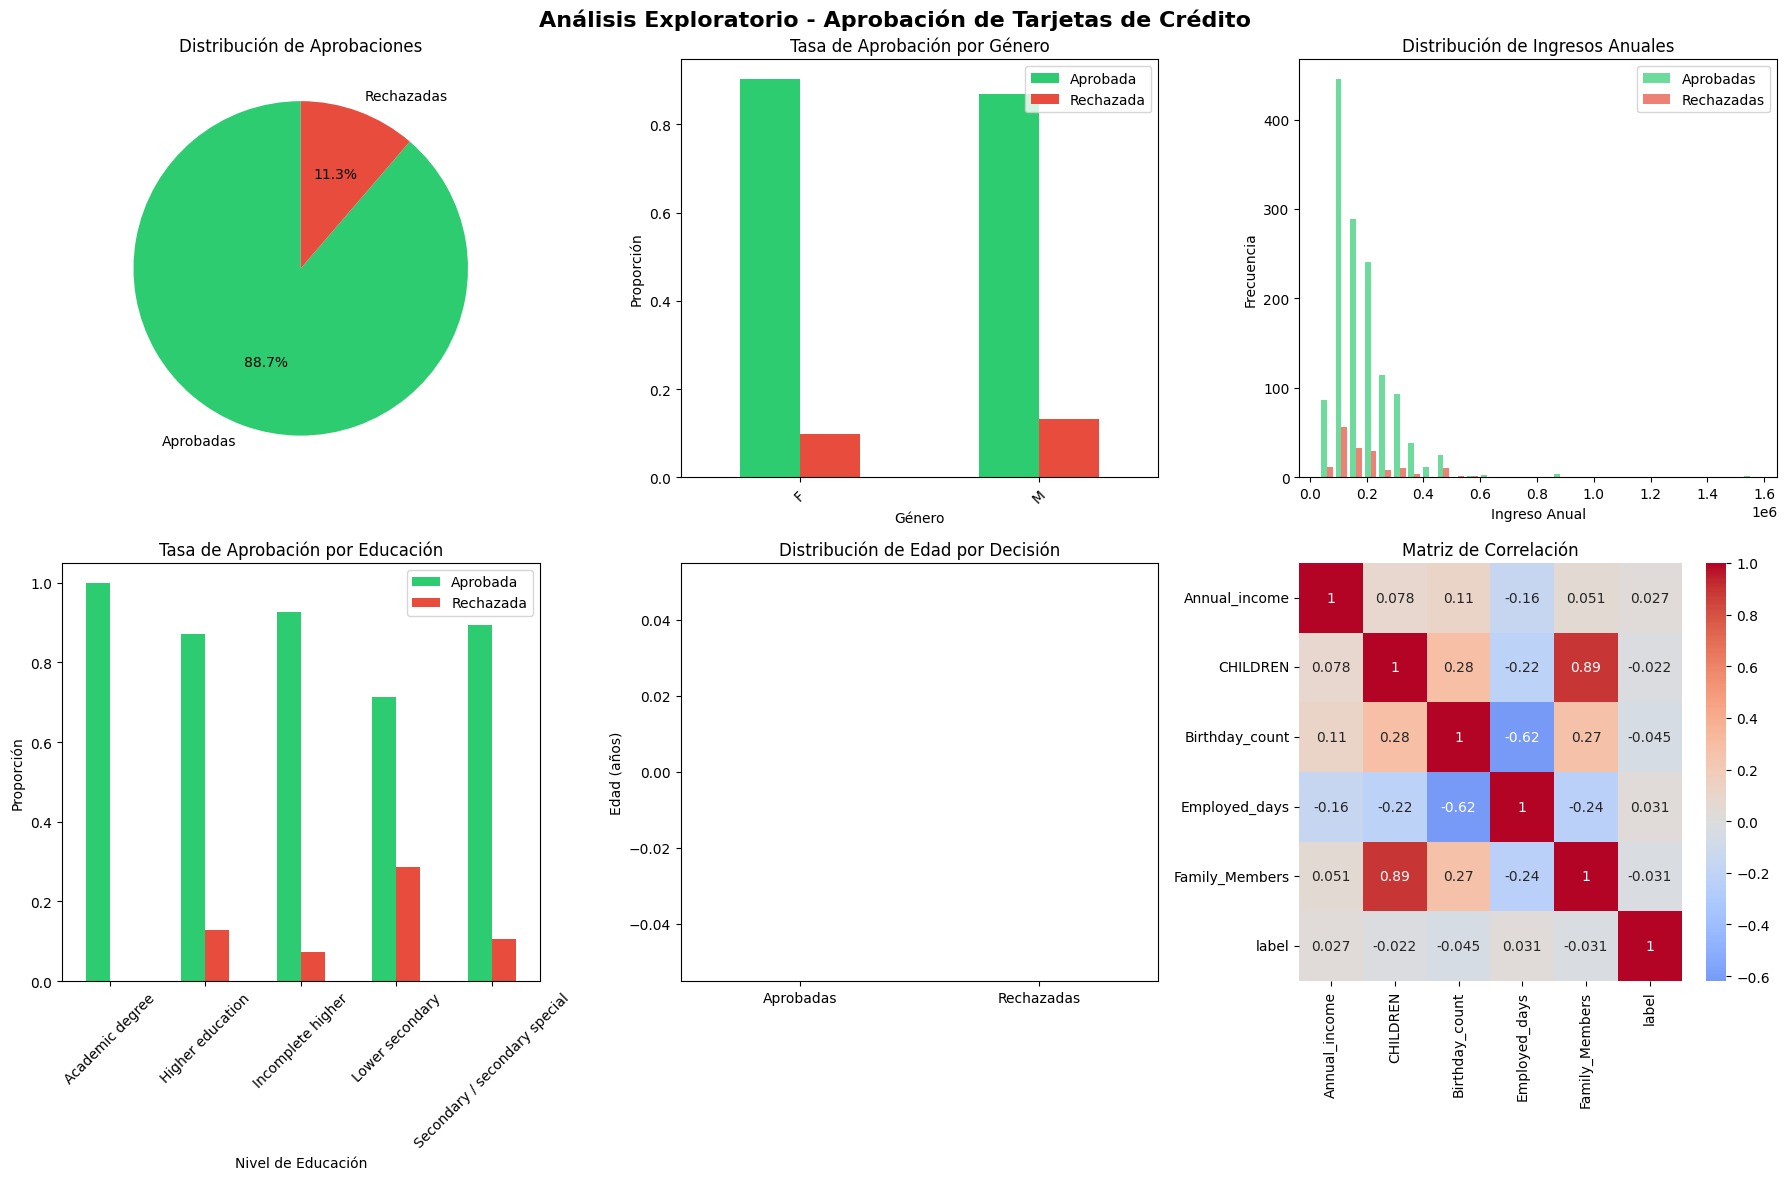


🔧 Preprocesando datos...
✅ Preprocesamiento completado:
   - Características utilizadas: 19
   - Muestras: 1548

🚀 Entrenando modelo Random Forest...
✅ Modelo entrenado exitosamente

¿Desea optimizar hiperparámetros? (puede tomar varios minutos)
Ingrese 'y' para sí, cualquier otra tecla para no: y

⚙️ Optimizando hiperparámetros...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
✅ Mejores parámetros encontrados:
   - max_depth: 15
   - min_samples_leaf: 1
   - min_samples_split: 5
   - n_estimators: 200

📊 EVALUACIÓN DEL MODELO
🎯 Métricas de rendimiento:
   - Accuracy: 0.9290
   - Precision: 0.8095
   - Recall: 0.4857
   - F1-Score: 0.6071
   - AUC-ROC: 0.8474

📋 Matriz de Confusión:
[[271   4]
 [ 18  17]]

📑 Reporte de Clasificación:
              precision    recall  f1-score   support

    Aprobada       0.94      0.99      0.96       275
   Rechazada       0.81      0.49      0.61        35

    accuracy                           0.93       310
   macro avg       0.

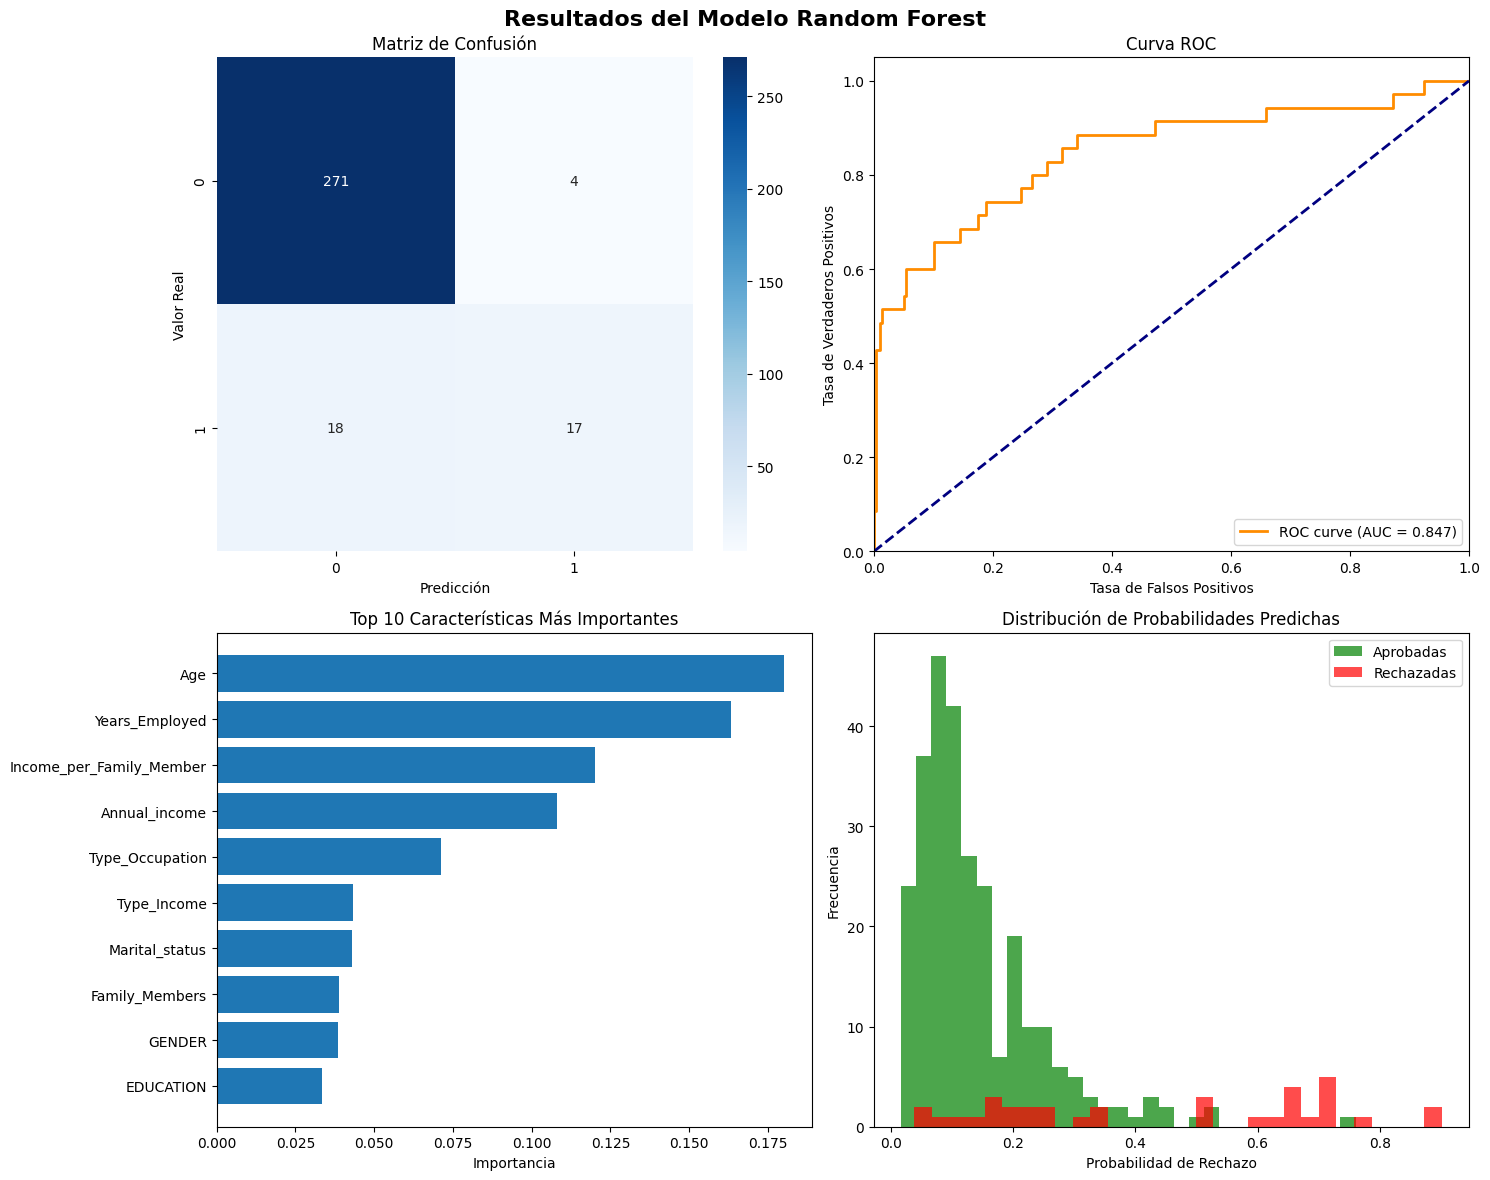


🏆 TOP 10 CARACTERÍSTICAS MÁS IMPORTANTES:
                 feature  importance
                     Age    0.179963
          Years_Employed    0.163365
Income_per_Family_Member    0.119974
           Annual_income    0.107934
         Type_Occupation    0.071154
             Type_Income    0.043415
          Marital_status    0.043041
          Family_Members    0.038690
                  GENDER    0.038352
               EDUCATION    0.033487

🔮 Ejemplo de predicción:
Predicción: Aprobada
Probabilidad de aprobación: 0.832
Probabilidad de rechazo: 0.168
Confianza: 0.832


In [15]:
# Clasificación de Tarjetas de Crédito con Random Forest
# Análisis completo para aprobación/rechazo de solicitudes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (classification_report, confusion_matrix,
                           accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, roc_curve)
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

class CreditCardClassifier:
    def __init__(self):
        """Inicializar el clasificador de tarjetas de crédito"""
        self.model = None
        self.label_encoders = {}
        self.scaler = StandardScaler()
        self.feature_names = []
        self.feature_importance = None

    def load_data(self, applications_path, labels_path):
        """
        Cargar y combinar los datasets

        Args:
            applications_path: Ruta del archivo de aplicaciones
            labels_path: Ruta del archivo de etiquetas
        """
        print("📊 Cargando datos...")

        # Cargar datasets
        self.applications = pd.read_csv("/content/Credit_card.csv")
        self.labels = pd.read_csv("/content/Credit_card_label.csv")

        # Combinar datasets
        self.data = pd.merge(self.applications, self.labels,
                           left_on='Ind_ID', right_on='Ind_ID', how='inner') # Modified 'ID' to 'Ind_ID'

        # Drop the duplicate 'ID' column from labels if it exists after merge, assuming 'Ind_ID' is the correct key
        if 'ID' in self.data.columns:
            self.data = self.data.drop('ID', axis=1)

        print("\nColumns in self.labels after loading:")
        print(self.labels.columns)
        print("\nColumns in self.data after merging:")
        print(self.data.columns)


        print(f"✅ Datos cargados exitosamente:")
        print(f"   - Filas: {len(self.data)}")
        print(f"   - Columnas: {len(self.data.columns)}")
        print(f"   - Aplicaciones aprobadas: {(self.data['label'] == 0).sum()}")
        print(f"   - Aplicaciones rechazadas: {(self.data['label'] == 1).sum()}")

        return self.data

    def explore_data(self):
        """Análisis exploratorio de datos"""
        print("\n🔍 ANÁLISIS EXPLORATORIO DE DATOS")
        print("=" * 50)

        # Información general
        print("\n📋 Información general del dataset:")
        print(self.data.info())

        # Estadísticas descriptivas
        print("\n📊 Estadísticas descriptivas:")
        print(self.data.describe())

        # Valores faltantes
        print("\n❌ Valores faltantes por columna:")
        missing_data = self.data.isnull().sum()
        missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
        if len(missing_data) > 0:
            print(missing_data)
        else:
            print("No hay valores faltantes")

        # Distribución de la variable objetivo
        print(f"\n🎯 Distribución de la variable objetivo:")
        label_dist = self.data['label'].value_counts()
        print(f"Aprobadas (0): {label_dist[0]} ({label_dist[0]/len(self.data)*100:.1f}%)")
        print(f"Rechazadas (1): {label_dist[1]} ({label_dist[1]/len(self.data)*100:.1f}%)")

        return missing_data, label_dist

    def visualize_data(self):
        """Crear visualizaciones de los datos"""
        print("\n📈 Creando visualizaciones...")

        # Configurar el estilo
        plt.style.use('default')
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle('Análisis Exploratorio - Aprobación de Tarjetas de Crédito',
                    fontsize=16, fontweight='bold')

        # 1. Distribución de la variable objetivo
        ax1 = axes[0, 0]
        label_counts = self.data['label'].value_counts()
        colors = ['#2ecc71', '#e74c3c']  # Verde para aprobado, rojo para rechazado
        wedges, texts, autotexts = ax1.pie(label_counts.values,
                                          labels=['Aprobadas', 'Rechazadas'],
                                          autopct='%1.1f%%',
                                          colors=colors,
                                          startangle=90)
        ax1.set_title('Distribución de Aprobaciones')

        # 2. Distribución por género
        ax2 = axes[0, 1]
        gender_approval = pd.crosstab(self.data['GENDER'], self.data['label'], normalize='index')
        gender_approval.plot(kind='bar', ax=ax2, color=colors)
        ax2.set_title('Tasa de Aprobación por Género')
        ax2.set_xlabel('Género')
        ax2.set_ylabel('Proporción')
        ax2.legend(['Aprobada', 'Rechazada'])
        ax2.tick_params(axis='x', rotation=45)

        # 3. Distribución de ingresos anuales
        ax3 = axes[0, 2]
        approved = self.data[self.data['label'] == 0]['Annual_income']
        rejected = self.data[self.data['label'] == 1]['Annual_income']
        ax3.hist([approved, rejected], bins=30, alpha=0.7,
                label=['Aprobadas', 'Rechazadas'], color=colors)
        ax3.set_title('Distribución de Ingresos Anuales')
        ax3.set_xlabel('Ingreso Anual')
        ax3.set_ylabel('Frecuencia')
        ax3.legend()

        # 4. Tasa de aprobación por educación
        ax4 = axes[1, 0]
        education_approval = pd.crosstab(self.data['EDUCATION'], self.data['label'], normalize='index')
        education_approval.plot(kind='bar', ax=ax4, color=colors)
        ax4.set_title('Tasa de Aprobación por Educación')
        ax4.set_xlabel('Nivel de Educación')
        ax4.set_ylabel('Proporción')
        ax4.legend(['Aprobada', 'Rechazada'])
        ax4.tick_params(axis='x', rotation=45)

        # 5. Relación entre edad y aprobación
        ax5 = axes[1, 1]
        # Convertir Birthday_count a edad aproximada
        self.data['Age'] = abs(self.data['Birthday_count']) / 365.25
        approved_age = self.data[self.data['label'] == 0]['Age']
        rejected_age = self.data[self.data['label'] == 1]['Age']
        ax5.boxplot([approved_age, rejected_age], labels=['Aprobadas', 'Rechazadas'])
        ax5.set_title('Distribución de Edad por Decisión')
        ax5.set_ylabel('Edad (años)')

        # 6. Correlación de variables numéricas
        ax6 = axes[1, 2]
        numeric_cols = ['Annual_income', 'CHILDREN', 'Birthday_count',
                       'Employed_days', 'Family_Members', 'label']
        corr_matrix = self.data[numeric_cols].corr()
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=ax6)
        ax6.set_title('Matriz de Correlación')

        plt.tight_layout()
        plt.show()

    def preprocess_data(self):
        """Preprocesar los datos para el modelo"""
        print("\n🔧 Preprocesando datos...")

        # Crear una copia de los datos
        df = self.data.copy()

        # Crear nuevas características
        df['Age'] = abs(df['Birthday_count']) / 365.25
        df['Years_Employed'] = abs(df['Employed_days']) / 365.25
        df['Income_per_Family_Member'] = df['Annual_income'] / (df['Family_Members'] + 1)
        df['Has_Communication'] = ((df['Mobile_phone'] == 1) |
                                  (df['Work_Phone'] == 1) |
                                  (df['Phone'] == 1) |
                                  (df['EMAIL_ID'] == 1)).astype(int)

        # Seleccionar características para el modelo
        features_to_encode = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income',
                             'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation']

        features_numeric = ['CHILDREN', 'Annual_income', 'Mobile_phone', 'Work_Phone',
                           'Phone', 'EMAIL_ID', 'Family_Members', 'Age', 'Years_Employed',
                           'Income_per_Family_Member', 'Has_Communication']

        # Codificar variables categóricas
        df_encoded = df.copy()
        for column in features_to_encode:
            if column in df.columns:
                le = LabelEncoder()
                df_encoded[column] = le.fit_transform(df[column].astype(str))
                self.label_encoders[column] = le

        # Combinar todas las características
        all_features = features_to_encode + features_numeric
        self.feature_names = [f for f in all_features if f in df_encoded.columns]

        # Prepare X e y
        X = df_encoded[self.feature_names]
        y = df_encoded['label']

        # Manejar valores faltantes
        imputer = SimpleImputer(strategy='median')
        X = pd.DataFrame(imputer.fit_transform(X), columns=self.feature_names)

        print(f"✅ Preprocesamiento completado:")
        print(f"   - Características utilizadas: {len(self.feature_names)}")
        print(f"   - Muestras: {len(X)}")

        return X, y


    def train_model(self, X, y, test_size=0.2, random_state=42):
        """Entrenar el modelo Random Forest"""
        print("\n🚀 Entrenando modelo Random Forest...")

        # Dividir datos
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state, stratify=y
        )

        # Entrenar modelo inicial
        self.model = RandomForestClassifier(
            n_estimators=100,
            max_depth=10,
            min_samples_split=5,
            min_samples_leaf=2,
            random_state=random_state,
            class_weight='balanced'  # Para manejar desbalance de clases
        )

        self.model.fit(X_train, y_train)

        # Obtener importancia de características
        self.feature_importance = pd.DataFrame({
            'feature': self.feature_names,
            'importance': self.model.feature_importances_
        }).sort_values('importance', ascending=False)

        print("✅ Modelo entrenado exitosamente")

        return X_train, X_test, y_train, y_test

    def optimize_hyperparameters(self, X_train, y_train):
        """Optimizar hiperparámetros usando GridSearch"""
        print("\n⚙️ Optimizando hiperparámetros...")

        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, 15, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }

        grid_search = GridSearchCV(
            RandomForestClassifier(random_state=42, class_weight='balanced'),
            param_grid,
            cv=5,
            scoring='f1',
            n_jobs=-1,
            verbose=1
        )

        grid_search.fit(X_train, y_train)

        print(f"✅ Mejores parámetros encontrados:")
        for param, value in grid_search.best_params_.items():
            print(f"   - {param}: {value}")

        # Actualizar modelo con mejores parámetros
        self.model = grid_search.best_estimator_

        return grid_search.best_params_

    def evaluate_model(self, X_test, y_test):
        """Evaluar el modelo"""
        print("\n📊 EVALUACIÓN DEL MODELO")
        print("=" * 40)

        # Predicciones
        y_pred = self.model.predict(X_test)
        y_pred_proba = self.model.predict_proba(X_test)[:, 1]

        # Métricas
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred_proba)

        print(f"🎯 Métricas de rendimiento:")
        print(f"   - Accuracy: {accuracy:.4f}")
        print(f"   - Precision: {precision:.4f}")
        print(f"   - Recall: {recall:.4f}")
        print(f"   - F1-Score: {f1:.4f}")
        print(f"   - AUC-ROC: {auc:.4f}")

        # Matriz de confusión
        print(f"\n📋 Matriz de Confusión:")
        cm = confusion_matrix(y_test, y_pred)
        print(cm)

        # Reporte de clasificación
        print(f"\n📑 Reporte de Clasificación:")
        print(classification_report(y_test, y_pred,
                                  target_names=['Aprobada', 'Rechazada']))

        # Validación cruzada
        cv_scores = cross_val_score(self.model, X_test, y_test, cv=5, scoring='f1')
        print(f"\n🔄 Validación Cruzada (F1-Score):")
        print(f"   - Media: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

        return {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'auc': auc,
            'cv_scores': cv_scores
        }

    def plot_results(self, X_test, y_test):
        """Visualizar resultados del modelo"""
        print("\n📈 Creando visualizaciones de resultados...")

        y_pred = self.model.predict(X_test)
        y_pred_proba = self.model.predict_proba(X_test)[:, 1]

        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('Resultados del Modelo Random Forest', fontsize=16, fontweight='bold')

        # 1. Matriz de confusión
        ax1 = axes[0, 0]
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
        ax1.set_title('Matriz de Confusión')
        ax1.set_xlabel('Predicción')
        ax1.set_ylabel('Valor Real')

        # 2. Curva ROC
        ax2 = axes[0, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        auc_score = roc_auc_score(y_test, y_pred_proba)
        ax2.plot(fpr, tpr, color='darkorange', lw=2,
                label=f'ROC curve (AUC = {auc_score:.3f})')
        ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax2.set_xlim([0.0, 1.0])
        ax2.set_ylim([0.0, 1.05])
        ax2.set_xlabel('Tasa de Falsos Positivos')
        ax2.set_ylabel('Tasa de Verdaderos Positivos')
        ax2.set_title('Curva ROC')
        ax2.legend(loc="lower right")

        # 3. Importancia de características (Top 10)
        ax3 = axes[1, 0]
        top_features = self.feature_importance.head(10)
        ax3.barh(range(len(top_features)), top_features['importance'])
        ax3.set_yticks(range(len(top_features)))
        ax3.set_yticklabels(top_features['feature'])
        ax3.set_xlabel('Importancia')
        ax3.set_title('Top 10 Características Más Importantes')
        ax3.invert_yaxis()

        # 4. Distribución de probabilidades
        ax4 = axes[1, 1]
        approved_probs = y_pred_proba[y_test == 0]
        rejected_probs = y_pred_proba[y_test == 1]
        ax4.hist(approved_probs, bins=30, alpha=0.7, label='Aprobadas', color='green')
        ax4.hist(rejected_probs, bins=30, alpha=0.7, label='Rechazadas', color='red')
        ax4.set_xlabel('Probabilidad de Rechazo')
        ax4.set_ylabel('Frecuencia')
        ax4.set_title('Distribución de Probabilidades Predichas')
        ax4.legend()

        plt.tight_layout()
        plt.show()

    def predict_new_application(self, application_data):
        """Predecir una nueva aplicación"""
        if self.model is None:
            raise ValueError("El modelo no ha sido entrenado aún")

        # Procesar los datos de entrada
        df = pd.DataFrame([application_data])

        # Create derived features
        df['Age'] = abs(df['Birthday_count']) / 365.25
        df['Years_Employed'] = abs(df['Employed_days']) / 365.25
        df['Income_per_Family_Member'] = df['Annual_income'] / (df['Family_Members'] + 1)
        df['Has_Communication'] = ((df['Mobile_phone'] == 1) |
                                  (df['Work_Phone'] == 1) | # Corrected key
                                  (df['Phone'] == 1) |
                                  (df['EMAIL_ID'] == 1)).astype(int)


        # Codificar variables categóricas
        for column, encoder in self.label_encoders.items():
            if column in df.columns:
                try:
                    df[column] = encoder.transform(df[column].astype(str))
                except ValueError:
                    # Valor no visto durante entrenamiento, usar el más común
                    df[column] = 0

        # Seleccionar características
        X_new = df[self.feature_names]

        # Hacer predicción
        prediction = self.model.predict(X_new)[0]
        probability = self.model.predict_proba(X_new)[0]

        result = {
            'prediction': 'Rechazada' if prediction == 1 else 'Aprobada',
            'probability_approved': probability[0],
            'probability_rejected': probability[1],
            'confidence': max(probability)
        }

        return result

def main():
    """Función principal para ejecutar el análisis completo"""
    print("🏦 SISTEMA DE CLASIFICACIÓN DE TARJETAS DE CRÉDITO")
    print("=" * 60)

    # Inicializar clasificador
    classifier = CreditCardClassifier()

    # Cargar datos (ajustar rutas según sea necesario)
    applications_path = "applications.csv"  # Cambiar por la ruta real
    labels_path = "Credit_card_label.csv"   # Cambiar por la ruta real

    try:
        # Cargar datos
        data = classifier.load_data(applications_path, labels_path)

        # Análisis exploratorio
        missing_data, label_dist = classifier.explore_data()

        # Visualizaciones
        classifier.visualize_data()

        # Preprocesar datos
        X, y = classifier.preprocess_data()

        # Entrenar modelo
        X_train, X_test, y_train, y_test = classifier.train_model(X, y)

        # Optimizar hiperparámetros (opcional, puede tomar tiempo)
        print("\n¿Desea optimizar hiperparámetros? (puede tomar varios minutos)")
        optimize = input("Ingrese 'y' para sí, cualquier otra tecla para no: ").lower()
        if optimize == 'y':
            best_params = classifier.optimize_hyperparameters(X_train, y_train)

        # Evaluar modelo
        metrics = classifier.evaluate_model(X_test, y_test)

        # Visualizar resultados
        classifier.plot_results(X_test, y_test)

        # Mostrar importancia de características
        print("\n🏆 TOP 10 CARACTERÍSTICAS MÁS IMPORTANTES:")
        print(classifier.feature_importance.head(10).to_string(index=False))

        # Ejemplo de predicción
        print("\n🔮 Ejemplo de predicción:")
        sample_application = {
            'GENDER': 'M',
            'Car_Owner': 'Y',
            'Propert_Owner': 'Y',
            'CHILDREN': 2,
            'Annual_income': 450000,
            'Type_Income': 'Working',
            'EDUCATION': 'Higher education',
            'Marital_status': 'Married',
            'Housing_type': 'House / apartment',
            'Birthday_count': -15000,
            'Employed_days': -3000,
            'Mobile_phone': 1,
            'Work_Phone': 0, # Corrected key
            'Phone': 1,
            'EMAIL_ID': 1,
            'Type_Occupation': 'Core staff',
            'Family_Members': 3
        }

        result = classifier.predict_new_application(sample_application)
        print(f"Predicción: {result['prediction']}")
        print(f"Probabilidad de aprobación: {result['probability_approved']:.3f}")
        print(f"Probabilidad de rechazo: {result['probability_rejected']:.3f}")
        print(f"Confianza: {result['confidence']:.3f}")

    except FileNotFoundError:
        print("❌ Error: No se pudieron encontrar los archivos CSV.")
        print("   Asegúrese de que los archivos estén en la ruta correcta:")
        print(f"   - {applications_path}")
        print(f"   - {labels_path}")


if __name__ == "__main__":
    main()